# The Impact of Lionel Messi’s Arrival on Inter Miami
### A Data-Driven Case Study on Performance and Fan Demand in MLS


## Project Overview
This project examines how Lionel Messi’s arrival affected Inter Miami’s on-field performance, competitive results, and fan demand in Major League Soccer (MLS).  
Using match-level data from the 2023–2025 seasons, the analysis evaluates short-term and sustained impacts on team outcomes and estimated matchday revenue.

## Research Questions
- How did Inter Miami’s on-field performance change after Messi’s arrival?
- Did improved performance translate into better competitive results (points)?
- How did fan demand and estimated matchday revenue evolve over time?

## Data Sources
- Match-level statistics and attendance data from FBref (MLS)
- Seasons covered: 2023–2025


In [1]:
import pandas as pd
pd.reset_option('display.float_format')
df_2023 = pd.read_csv("inter_miami_2023_mls.txt", sep="\t")
# df_2023.head()
df_2024 = pd.read_csv("inter_miami_2024_mls.txt", sep="\t")
# df_2024.head()
df_2025 = pd.read_csv("inter_miami_2025_mls.txt", sep="\t")
# df_2025.head()

## Data Cleaning & Feature Engineering

In [2]:
#Convert columns to analysis-friendly types

# Date → datetime
# GF/GA/xG/xGA/Poss → numbers
# Attendance → numbers

# (1)
df_2023['Date'] = pd.to_datetime(df_2023['Date'])
df_2024['Date'] = pd.to_datetime(df_2024['Date'])
df_2025['Date'] = pd.to_datetime(df_2025['Date'])

# (2) 
num_cols = ['GF', 'GA', 'xG', 'xGA', 'Poss']
for c in num_cols:
    df_2023[c] = pd.to_numeric(df_2023[c], errors='coerce')
    df_2024[c] = pd.to_numeric(df_2024[c], errors='coerce')
    df_2025[c] = pd.to_numeric(df_2025[c], errors='coerce')

# (3) Attendance: "17,655" -> 17655
df_2023['Attendance'] = (
    df_2023['Attendance']
      .astype(str)                 
      .str.replace(',', '', regex=False)  
)
df_2023['Attendance'] = pd.to_numeric(df_2023['Attendance'], errors='coerce')

df_2024['Attendance'] = (
    df_2024['Attendance']
      .astype(str)                 
      .str.replace(',', '', regex=False)  
)
df_2024['Attendance'] = pd.to_numeric(df_2024['Attendance'], errors='coerce')

df_2025['Attendance'] = (
    df_2025['Attendance']
      .astype(str)                 
      .str.replace(',', '', regex=False)  
)
df_2025['Attendance'] = pd.to_numeric(df_2025['Attendance'], errors='coerce')

## Period Definition & Labeling
To distinguish between short-term and sustained effects of Messi’s arrival, the post-signing timeline is divided into multiple phases.

### Period Definition Rationale
- **Before Messi (2023)**: Matches prior to Messi’s arrival
- **Messi Adaptation (2023)**: Immediate post-arrival phase within the same season
- **Messi Era (2024–2025)**: Subsequent full seasons after team structure and tactics stabilized
  

In [3]:
df_2023['Season'] = 2023     #Labeling Year information
df_2024['Season'] = 2024
df_2025['Season'] = 2025

MESSI_JOIN_DATE = pd.to_datetime('2023-07-21')  
df_2023['Period'] = df_2023['Date'].apply(
    lambda x: 'Before Messi' if x < MESSI_JOIN_DATE else 'Messi Adaptation'
) 
df_2024['Period'] = 'Messi Era(2024)'
df_2025['Period'] = 'Messi Era(2025)'

## Data Consolidation & Summary Tables
All season-level datasets are combined into a single DataFrame and summarized by season and period to enable comparative analysis.


In [4]:
df_all = pd.concat([df_2023, df_2024, df_2025], ignore_index=True) #Concatenating dataframes

In [5]:
df_all['Points'] = df_all['Result'].map({
    'W' : 3,
    'D' : 1, 
    'L' : 0
}) 

In [6]:
summary_all = df_all.groupby(['Season', 'Period'])[['Points','GF','GA','xG','xGA','Poss','Attendance']].mean()
summary_all

Points        GF        GA        xG       xGA  \
Season Period                                                               
2023   Before Messi      0.818182  1.000000  1.636364  0.945455  1.559091   
       Messi Adaptation  1.333333  1.583333  1.500000  1.433333  1.483333   
2024   Messi Era(2024)   2.081081  2.270270  1.486486  1.664865  1.543243   
2025   Messi Era(2025)   2.000000  2.525000  1.500000  2.022500  1.385000   

                              Poss    Attendance  
Season Period                                     
2023   Before Messi      53.272727  19586.590909  
       Messi Adaptation  56.916667  32845.333333  
2024   Messi Era(2024)   55.351351  30109.054054  
2025   Messi Era(2025)   55.700000  25512.800000

In [7]:
plot_df = summary_all.reset_index()
plot_df

,Season,Period,Points,GF,GA,xG,xGA,Poss,Attendance
0,2023,Before Messi,0.818182,1.000000,1.636364,0.945455,1.559091,53.272727,19586.590909
1,2023,Messi Adaptation,1.333333,1.583333,1.500000,1.433333,1.483333,56.916667,32845.333333
2,2024,Messi Era(2024),2.081081,2.270270,1.486486,1.664865,1.543243,55.351351,30109.054054
3,2025,Messi Era(2025),2.000000,2.525000,1.500000,2.022500,1.385000,55.700000,25512.800000


## Exploratory Analysis (Validation)
Initial exploratory visualizations are used to verify data integrity and confirm directional trends before producing final presentation-ready charts.


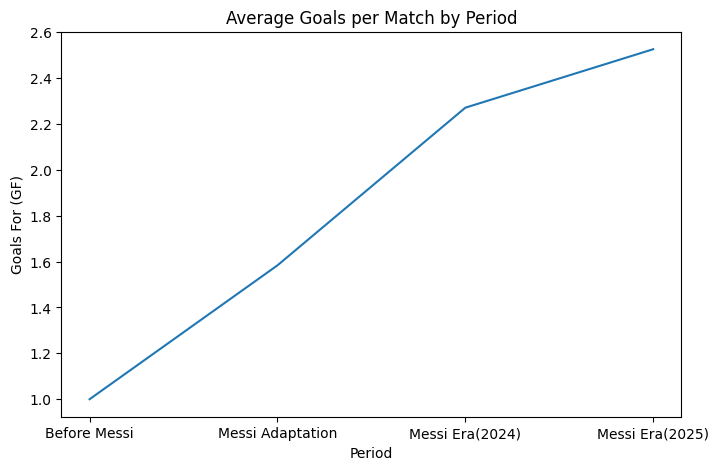

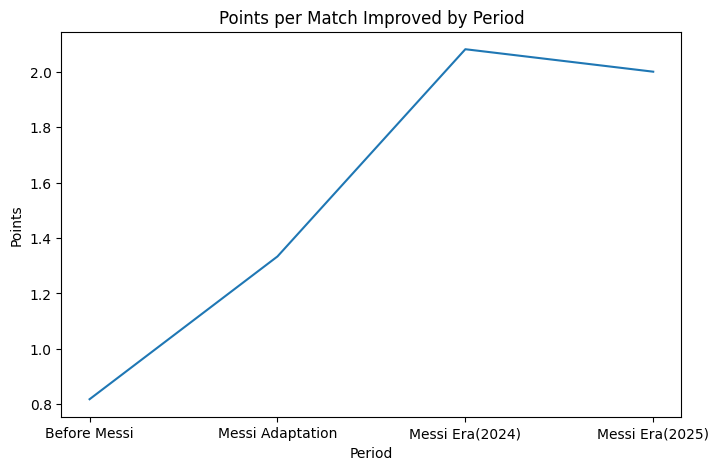

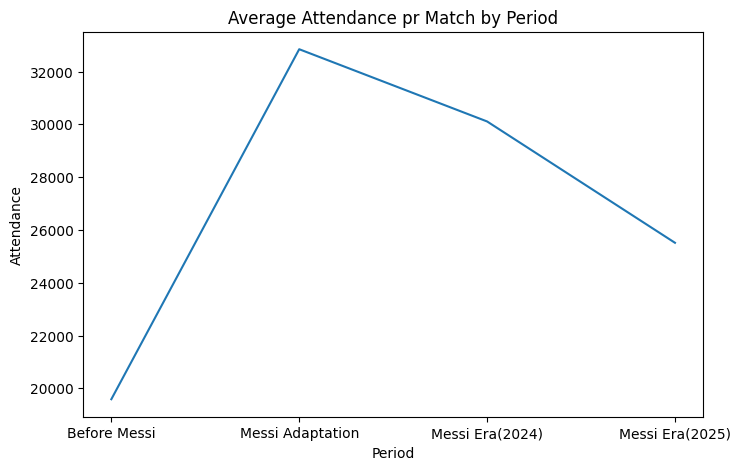

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8,5))
plt.plot(plot_df['Period'], plot_df['GF'])
plt.title('Average Goals per Match by Period')
plt.xlabel('Period')
plt.ylabel('Goals For (GF)')
plt.show()

plt.figure(figsize = (8,5))
plt.plot(plot_df['Period'],plot_df['Points'])
plt.title('Points per Match Improved by Period')
plt.xlabel('Period')
plt.ylabel('Points')
plt.show()

plt.figure(figsize = (8,5))
plt.plot(plot_df['Period'], plot_df['Attendance'])
plt.title('Average Attendance pr Match by Period')
plt.xlabel('Period')
plt.ylabel('Attendance')
plt.show()

In [9]:
baseline_attendance = summary_all.loc[(2023, 'Before Messi'), 'Attendance']
# print(baseline_attendance)

attendance_df = summary_all[['Attendance']].reset_index()

attendance_df['Attendance Increase VS Baseline'] = attendance_df['Attendance'] - baseline_attendance

# attendance_df

AVG_TICKET_PRICE = 40  #USD, PROXY
HOME_MATCHES_PER_SEASON = 17

attendance_df['Estimated Revenue per Match (USD)'] = attendance_df['Attendance Increase VS Baseline']*AVG_TICKET_PRICE

attendance_df['Estimated Season Revenue (USD)'] = attendance_df['Estimated Revenue per Match (USD)']*HOME_MATCHES_PER_SEASON

pd.options.display.float_format = '{:,.0f}'.format
attendance_df

,Season,Period,Attendance,Attendance Increase VS Baseline,Estimated Revenue per Match (USD),Estimated Season Revenue (USD)
0,2023,Before Messi,"19,587",0,0,0
1,2023,Messi Adaptation,"32,845","13,259","530,350","9,015,945"
2,2024,Messi Era(2024),"30,109","10,522","420,899","7,155,275"
3,2025,Messi Era(2025),"25,513","5,926","237,048","4,029,822"


## Final Visualization: On-Field Performance
The following charts illustrate how Inter Miami’s attacking output and competitive results evolved across different periods.

In [10]:
plot_df = summary_all.reset_index()
period_order = [
    'Before Messi',
    'Messi Adaptation',
    'Messi Era(2024)',
    'Messi Era(2025)'
]

plot_df['Period'] = pd.Categorical(
    plot_df['Period'],
    categories = period_order,
    ordered = True
)

plot_df = plot_df.sort_values('Period')

# plot_df[['Season', 'Period', 'Points', 'GF', 'Attendance']]

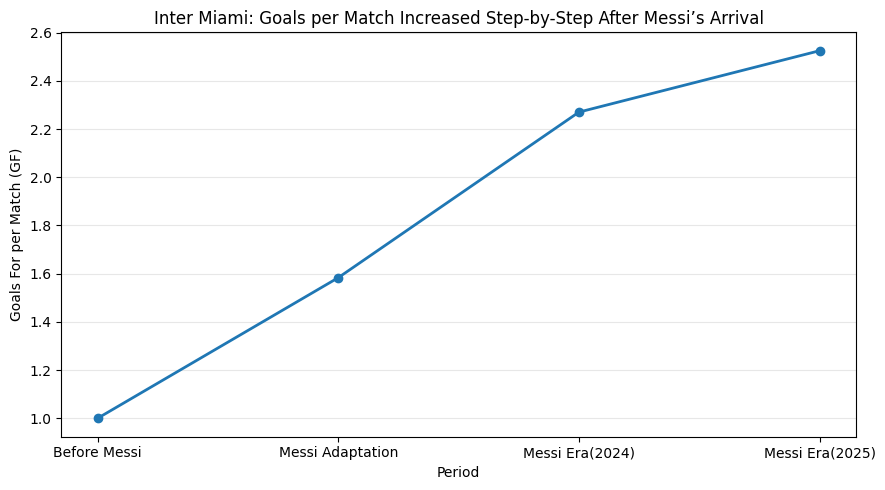

In [11]:
plt.figure(figsize = (9,5))
plt.plot(plot_df['Period'], plot_df['GF'], marker = 'o', linewidth = 2)

plt.title(
    "Inter Miami: Goals per Match Increased Step-by-Step After Messi’s Arrival", fontsize = 12
)
plt.xlabel('Period')
plt.ylabel('Goals For per Match (GF)')

plt.grid(axis = 'y', alpha = 0.3)
plt.tight_layout()
plt.show()

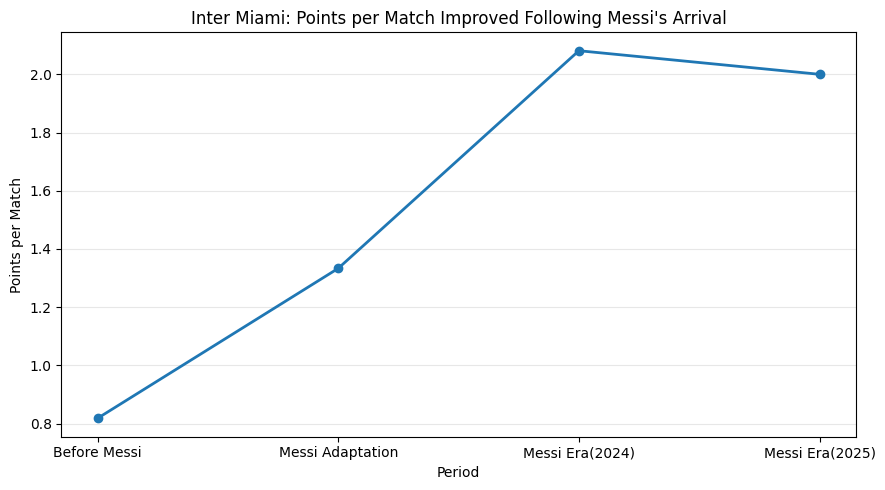

In [12]:
plt.figure(figsize = (9,5))
plt.plot(plot_df['Period'], plot_df['Points'], marker = 'o', linewidth = 2)

plt.title(
    "Inter Miami: Points per Match Improved Following Messi's Arrival", fontsize = 12
)

plt.xlabel('Period')
plt.ylabel('Points per Match')
plt.grid(axis = 'y', alpha = 0.3)
plt.tight_layout()
plt.show()

### Key Takeaways (Performance)
- Goals per match increased steadily after Messi’s arrival.
- Improvements in attacking output translated into higher points per match.


## Final Visualization: Fan Demand
Attendance trends are analyzed to assess changes in fan demand following Messi’s arrival.

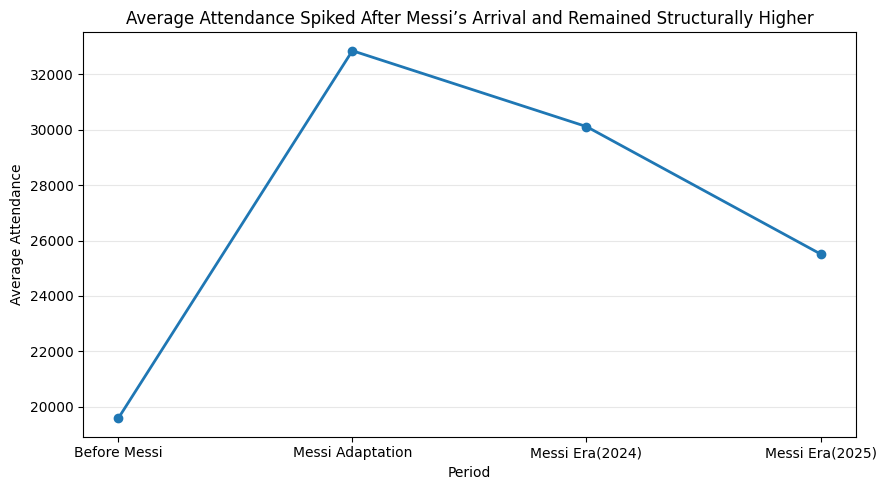

In [13]:
plt.figure(figsize = (9,5))
plt.plot(plot_df['Period'], plot_df['Attendance'], marker = 'o', linewidth = 2)

plt.title(
    "Average Attendance Spiked After Messi’s Arrival and Remained Structurally Higher", fontsize = 12
)
plt.xlabel('Period')
plt.ylabel('Average Attendance')

plt.grid(axis = 'y', alpha = 0.3)
plt.tight_layout()
plt.show()

## Estimated Revenue Impact (Attendance-Based Proxy)
Using average attendance increases as a proxy for matchday demand, the analysis estimates the potential revenue impact of Messi’s arrival.

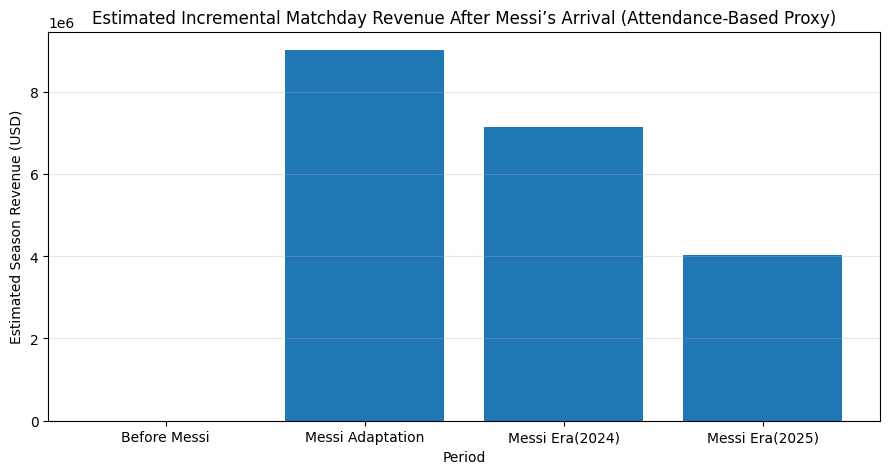

In [14]:
rev_plot_df = attendance_df.copy()

rev_plot_df['Period'] = pd.Categorical(rev_plot_df['Period'], categories = period_order, ordered = True)

rev_plot_df = rev_plot_df.sort_values('Period')

plt.figure(figsize = (9,5))
plt.bar(rev_plot_df['Period'], rev_plot_df['Estimated Season Revenue (USD)'])

plt.title('Estimated Incremental Matchday Revenue After Messi’s Arrival (Attendance-Based Proxy)', fontsize = 12)
plt.xlabel('Period')
plt.ylabel('Estimated Season Revenue (USD)')
plt.grid(axis = 'y', alpha = 0.3)
plt.tight_layout()
plt.show()

### Estimated Revenue Impact (Attendance-Based Proxy)

Using average attendance increases as a proxy for matchday demand, the analysis estimates that Messi’s arrival generated substantial incremental ticket revenue potential for Inter Miami.  
Under conservative assumptions—an average ticket price of $40 and 17 regular-season home matches—the post-Messi periods correspond to a multi-million-dollar increase in estimated matchday revenue per season.

The largest revenue uplift occurred during the immediate adaptation phase following Messi’s arrival, driven by a sharp spike in attendance.  
In subsequent seasons, incremental revenue remained meaningfully above the pre-Messi baseline, though at a gradually moderating level, consistent with a transition from short-term hype to stabilized fan demand.

## Business Implications

The analysis indicates that Lionel Messi’s signing created value for Inter Miami through multiple reinforcing channels:

1. **On-field performance** improved steadily, as reflected by higher goals scored and increased points per match across the adaptation phase and subsequent seasons.
2. **Fan demand** increased sharply immediately after Messi’s arrival and remained structurally higher in later seasons, suggesting that initial hype transitioned into sustained interest.
3. **Revenue potential**, estimated using attendance-based proxies, indicates that increased fan turnout likely translated into meaningful incremental matchday revenue.

Under conservative assumptions (average ticket price of $40 and 17 regular-season home matches), the post-Messi periods correspond to approximately **$4–9 million in additional matchday revenue per season** relative to the pre-Messi baseline.

Taken together, the findings suggest that the signing functioned not only as a sporting upgrade but also as a high-impact business investment with both immediate and durable returns.

## Limitations

This analysis is subject to several limitations.  
First, it relies on publicly available match-level and attendance data and does not include direct financial figures such as ticket revenue, merchandise sales, or media subscription data. As a result, revenue impacts are estimated using attendance-based proxies rather than observed financial outcomes.

Second, ticket price assumptions are simplified and may vary by opponent, seating category, and match importance. The estimated revenue figures should therefore be interpreted as indicative magnitudes rather than precise values.

Finally, the analysis focuses on a single case study—Lionel Messi’s arrival at Inter Miami. While the findings highlight mechanisms through which a global superstar signing can generate sporting and commercial value, the results may not fully generalize to other players, teams, or leagues.

## Conclusion

This case study examined the impact of Lionel Messi’s arrival on Inter Miami by analyzing changes in on-field performance, competitive outcomes, and fan demand in Major League Soccer. The results show clear improvements in goals scored and points per match following Messi’s signing, alongside a substantial and sustained increase in average attendance.

Using attendance-based revenue proxies, the analysis further suggests that these sporting gains were accompanied by meaningful commercial upside, with estimated incremental matchday revenue reaching multi-million-dollar levels per season under conservative assumptions.

While centered on a single, high-profile case, the findings illustrate how a global superstar signing can function as both a competitive catalyst and a business investment. More broadly, the analysis provides insight into why Major League Soccer has increasingly pursued marquee international players as part of its long-term growth strategy.